In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.patches import Arc

## 生成数据

In [2]:
data = {
    'test1': [70.2, 69.1, 68.3, 74.8],
    'test2': [75.0, 77.9, 74.5, 70.5],
    'test3': [79.1, 62.9, 77.8, 77.2],
    'test4': [60.2, 61.2, 65.8, 60.2],
    'test5': [87.3, 74.3, 84.5, 80.7],
    'test6': [96.4, 85.6, 96.5, 81.6],
    'test7': [70.8, 56.1, 68.3, 74.8],
    'test8': [61.3, 62.1, 66.8, 64.2],
    'test9': [70.5, 67.7, 63.8, 74.8],
    'model': ['model1', 'model2', 'model3', 'model4']
}
df = pd.DataFrame(data=data)

In [3]:
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,model
0,70.2,75.0,79.1,60.2,87.3,96.4,70.8,61.3,70.5,model1
1,69.1,77.9,62.9,61.2,74.3,85.6,56.1,62.1,67.7,model2
2,68.3,74.5,77.8,65.8,84.5,96.5,68.3,66.8,63.8,model3
3,74.8,70.5,77.2,60.2,80.7,81.6,74.8,64.2,74.8,model4


## 可视化

In [4]:
colors = ['#6758cf', '#f781be', '#fde0c2', '#bfe3bf']

# 提取数据
categories = list(df.drop(columns='model').columns)  # 9个test
N = len(categories)

theta = np.linspace(0, 2 * np.pi, N, endpoint=False)  # 均匀分布角度
bar_width = 2 * np.pi / (N * (df.shape[0] + 2))  # 控制模型间距
bottom = 100  # 控制离圆心距离
model_num = len(df['model'])

[-0.17453293  0.52359878  1.22173048  1.91986218  2.61799388  3.31612558
  4.01425728  4.71238898  5.41052068]
[-0.05817764  0.63995406  1.33808576  2.03621746  2.73434916  3.43248086
  4.13061256  4.82874426  5.52687596]
[0.05817764 0.75630934 1.45444104 2.15257274 2.85070444 3.54883615
 4.24696785 4.94509955 5.64323125]
[0.17453293 0.87266463 1.57079633 2.26892803 2.96705973 3.66519143
 4.36332313 5.06145483 5.75958653]


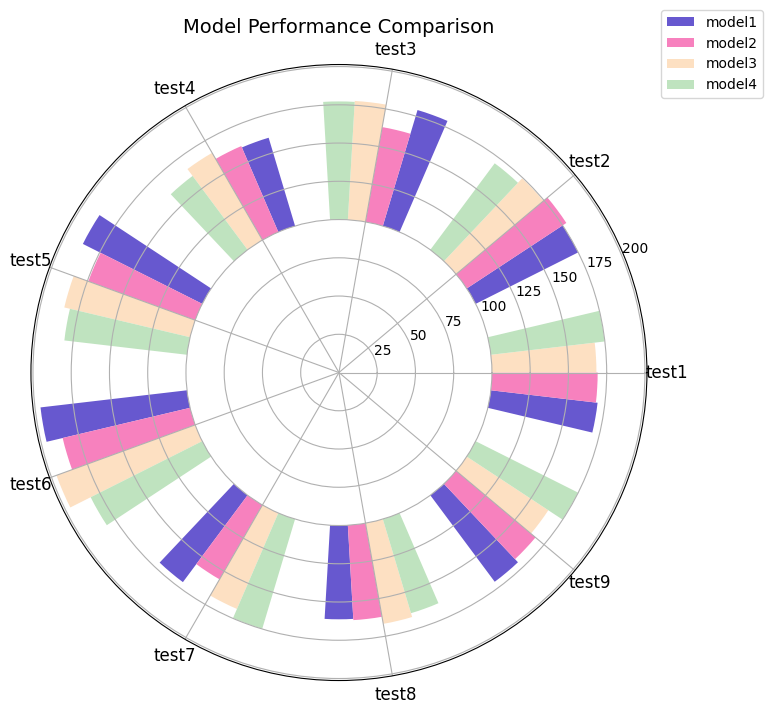

In [5]:
# 创建极坐标图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# 填数据
for i, model in enumerate(df['model']):
    values = df.query(f'model=="{model}"').drop(columns='model').values[0]  # 对应模型的精度值
    angles = theta + (i - (model_num - 1) / 2) * bar_width
    print(angles)
    ax.bar(angles, values, width=bar_width, color=colors[i], label=model, bottom=bottom)

# 设置标签
ax.set_xticks(theta)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Model Performance Comparison", fontsize=14)
plt.show()

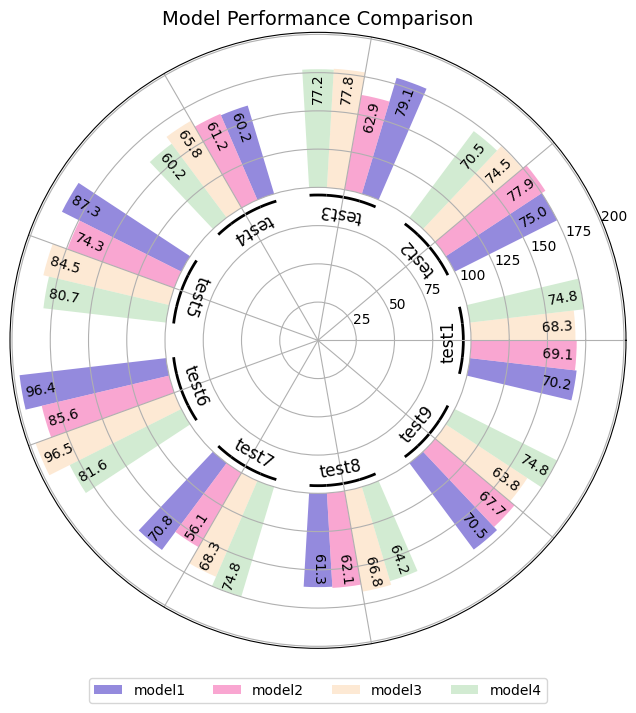

In [6]:
# 创建极坐标图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# 填数据
for i, model in enumerate(df['model']):
    values = df.query(f'model=="{model}"').drop(columns='model').values[0]  # 对应模型的精度值
    angles = theta + (i - (model_num - 1) / 2) * bar_width
    bars = ax.bar(angles, values, width=bar_width, alpha=0.7, color=colors[i], label=model, bottom=bottom)

    # 在柱状图上显示数值
    for bar, angle, value in zip(bars, angles, df.iloc[i, :-1].values):
        x = angle
        y = bottom + value - 12 # 控制标签位置
        rotation_angle = np.degrees(angle)
        if np.pi / 2 < angle < 3 * np.pi / 2:
            rotation_angle += 180  # 反转左侧文本的角度
        ax.text(x, y, f'{value:.1f}', ha='center', va='center', fontsize=10, rotation=rotation_angle)

    arc_radius = bottom - 5  # 设置弧线的半径，使其位于柱状图下方
    for angle in angles:
        arc = Arc((0, 0),  # 圆心
                width=arc_radius * 2, height=arc_radius * 2,  # 宽度和高度决定了弧线的大小
                theta1=np.degrees(angle - bar_width / 2),  # 起始角度
                theta2=np.degrees(angle + bar_width / 2),  # 结束角度
                transform=ax.transData._b,  # 使用与数据相同的坐标系
                color='black',  # 弧线颜色
                linewidth=2,
                zorder=0  # 将弧线置于柱状图下方
                )
        ax.add_patch(arc)

# 设置标签
ax.set_xticks(theta)
ax.set_xticklabels([])
# 在径向距离为 90 处添加新的 x 轴标签，且垂直于极轴
for angle, category in zip(theta, categories):
    rotation_angle = np.degrees(angle) + 90
    ax.text(angle, 85, category, ha='center', va='center', fontsize=12, rotation=rotation_angle)

ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.1))
plt.title("Model Performance Comparison", fontsize=14)
plt.show()

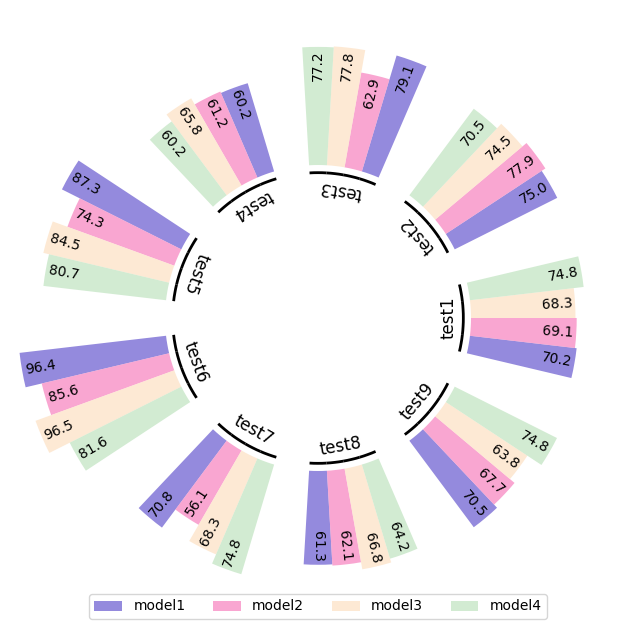

In [7]:
# 创建极坐标图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# 填数据
for i, model in enumerate(df['model']):
    values = df.query(f'model=="{model}"').drop(columns='model').values[0]  # 对应模型的精度值
    angles = theta + (i - (model_num - 1) / 2) * bar_width
    bars = ax.bar(angles, values, width=bar_width, alpha=0.7, color=colors[i], label=model, bottom=bottom)

    # 在柱状图上显示数值
    for bar, angle, value in zip(bars, angles, df.iloc[i, :-1].values):
        x = angle
        y = bottom + value - 12 # 控制标签位置
        rotation_angle = np.degrees(angle)
        if np.pi / 2 < angle < 3 * np.pi / 2:
            rotation_angle += 180  # 反转左侧文本的角度
        ax.text(x, y, f'{value:.1f}', ha='center', va='center', fontsize=10, rotation=rotation_angle)

    arc_radius = bottom - 5  # 设置弧线的半径，使其位于柱状图下方
    for angle in angles:
        arc = Arc((0, 0),  # 圆心
                width=arc_radius * 2, height=arc_radius * 2,  # 宽度和高度决定了弧线的大小
                theta1=np.degrees(angle - bar_width / 2),  # 起始角度
                theta2=np.degrees(angle + bar_width / 2),  # 结束角度
                transform=ax.transData._b,  # 使用与数据相同的坐标系
                color='black',  # 弧线颜色
                linewidth=2,
                zorder=0  # 将弧线置于柱状图下方
                )
        ax.add_patch(arc)

# 设置标签
ax.set_xticks(theta)
ax.set_xticklabels([])
# 在径向距离为 90 处添加新的 x 轴标签，且垂直于极轴
for angle, category in zip(theta, categories):
    rotation_angle = np.degrees(angle) + 90
    ax.text(angle, 85, category, ha='center', va='center', fontsize=12, rotation=rotation_angle)

# 去掉 xy 轴和 y 标签
ax.yaxis.grid(False)   
ax.xaxis.grid(False)   
ax.set_yticks([])      
ax.set_yticklabels([]) 
ax.spines['polar'].set_visible(False)  # 去掉最外侧的框

ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, 0))
plt.show()

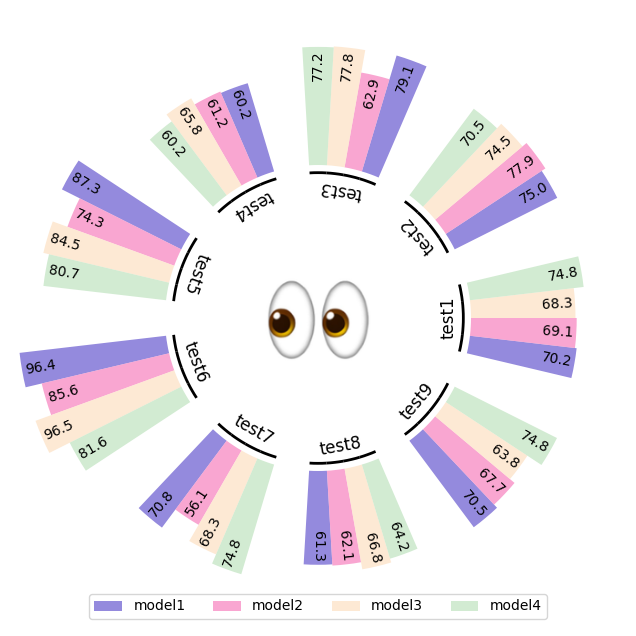

In [8]:
# 创建极坐标图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# 填数据
for i, model in enumerate(df['model']):
    values = df.query(f'model=="{model}"').drop(columns='model').values[0]  # 对应模型的精度值
    angles = theta + (i - (model_num - 1) / 2) * bar_width
    bars = ax.bar(angles, values, width=bar_width, alpha=0.7, color=colors[i], label=model, bottom=bottom)

    # 在柱状图上显示数值
    for bar, angle, value in zip(bars, angles, df.iloc[i, :-1].values):
        x = angle
        y = bottom + value - 12 # 控制标签位置
        rotation_angle = np.degrees(angle)
        if np.pi / 2 < angle < 3 * np.pi / 2:
            rotation_angle += 180  # 反转左侧文本的角度
        ax.text(x, y, f'{value:.1f}', ha='center', va='center', fontsize=10, rotation=rotation_angle)

    arc_radius = bottom - 5  # 设置弧线的半径，使其位于柱状图下方
    for angle in angles:
        arc = Arc((0, 0),  # 圆心
                width=arc_radius * 2, height=arc_radius * 2,  # 宽度和高度决定了弧线的大小
                theta1=np.degrees(angle - bar_width / 2),  # 起始角度
                theta2=np.degrees(angle + bar_width / 2),  # 结束角度
                transform=ax.transData._b,  # 使用与数据相同的坐标系
                color='black',  # 弧线颜色
                linewidth=2,
                zorder=0  # 将弧线置于柱状图下方
                )
        ax.add_patch(arc)

# 设置标签
ax.set_xticks(theta)
ax.set_xticklabels([])
# 在径向距离为 90 处添加新的 x 轴标签，且垂直于极轴
for angle, category in zip(theta, categories):
    rotation_angle = np.degrees(angle) + 90
    ax.text(angle, 85, category, ha='center', va='center', fontsize=12, rotation=rotation_angle)

# 去掉 xy 轴和 y 标签
ax.yaxis.grid(False)   
ax.xaxis.grid(False)   
ax.set_yticks([])      
ax.set_yticklabels([]) 
ax.spines['polar'].set_visible(False)  # 去掉最外侧的框

# 中心插入本地图片
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
image_path = '../data/qwen_eye.png'
img = plt.imread(image_path)
imagebox = OffsetImage(img, zoom=0.65)  # 调整 zoom 来改变图片大小
ab = AnnotationBbox(imagebox, (0, 0), frameon=False)
ax.add_artist(ab)

ax.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, 0))
plt.show()